# Exploring SigMorphon 2019 Task 2 Datasets

In [104]:
from itertools import chain
import os
import pandas as pd

## Required functions and classes

In [89]:
class Sentence(object):
    """Sentence class with surface words, lemmas and morphological tags
    
    """
    
    def __init__(self, conll_sentence):
        """Create a Sentence object from a conll sentence
        
        Arguments:
            conll_sentence: (list) list of conll lines correspond to one sentence
        """
        self.surface_words = []
        self.lemmas = []
        self.morph_tags = []
        
        for conll_token in conll_sentence:
            if not conll_token or conll_token.startswith('#'):
                continue
            _splits = conll_token.split('\t')
            self.surface_words.append(_splits[1])
            self.lemmas.append(_splits[2])
            self.morph_tags.append(_splits[5].split(';'))
            
    def get_tags_as_str(self):
        return [';'.join(morph_tags) for morph_tags in self.morph_tags]
            
    
    def __repr__(self):
        return "\n".join(
            ['Surface: {}, Lemma: {}, MorphTags: {}'.format(surface, lemma, ';'.join(morph_tags))
             for surface, lemma, morph_tags in zip(self.surface_words, self.lemmas, self.morph_tags)]
        )

In [90]:
def read_dataset(conll_file):
    """Read Conll dataset
    
    Argumets:
        conll_file: (str) conll file path
    Returns:
        list: list of `Sentence` objects
    """
    sentences = []
    with open(conll_file, 'r', encoding='UTF-8') as f:
        conll_sentence = []
        for line in f:
            if len(line.strip())==0:
                if len(conll_sentence) > 0:
                    sentence = Sentence(conll_sentence)
                    sentences.append(sentence)
                conll_sentence = []
            else:
                conll_sentence.append(line)
    return sentences                

In [92]:
def get_stats(sentences):
    """Calculate statistics of surface words, lemmas and morphological tags in given sentences
    
    Arguments:
        sentences: (list) list of `Sentence` objects
    Returns:
        dict: stats dict
    """
    
    def flatten(_list):
        return list(chain(*_list))
    
    number_of_sentences = len(sentences)
    number_of_tokens = len(flatten([sentence.surface_words for sentence in sentences]))
    number_of_unique_words = len(set(flatten([sentence.surface_words for sentence in sentences])))
    number_of_unique_lemmas = len(set(flatten([sentence.lemmas for sentence in sentences])))
    number_of_unique_tags = len(set(flatten([sentence.get_tags_as_str() for sentence in sentences])))
    number_of_unique_features = len(set(flatten(flatten([sentence.morph_tags for sentence in sentences]))))
    
    return {
        'Number of sentence': number_of_sentences,
        'Number of tokens': number_of_tokens,
        'Number of unique words': number_of_unique_words,
        'Number of unique lemmas': number_of_unique_lemmas,
        'Number of unique morphological tags': number_of_unique_tags,
        'Number of unique morphological features': number_of_unique_features
    }

## Create datasets and stats for each language

In [97]:
language_paths = ['data/2019/task2/' + filename for filename in os.listdir('data/2019/task2/')]
language_names = [filename.replace('UD_', '') for filename in os.listdir('data/2019/task2/')]

In [103]:
datasets_train = {}
datasets_val = {}
dataset_stats = {}
for language_path, language_name in zip(language_paths, language_names):
    language_conll_files = os.listdir(language_path)
    assert len(language_conll_files) == 2, 'More than 2 files'
    for language_conll_file in language_conll_files:
        if 'train' in language_conll_file:
            datasets_train[language_name] = read_dataset(language_path + '/' + language_conll_file)
            dataset_stats[language_name] = get_stats(datasets_train[language_name])
        else:
            datasets_val[language_name] = read_dataset(language_path + '/' + language_conll_file)

## Data set sizes

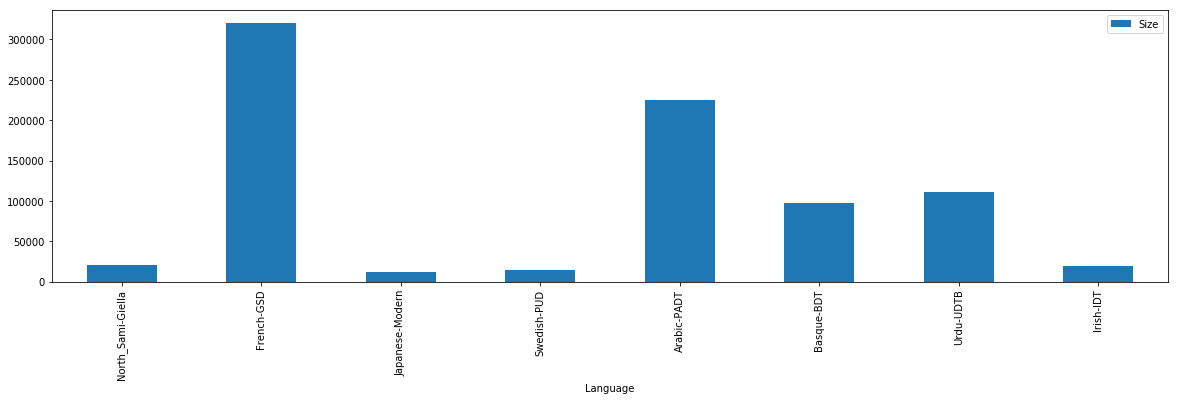

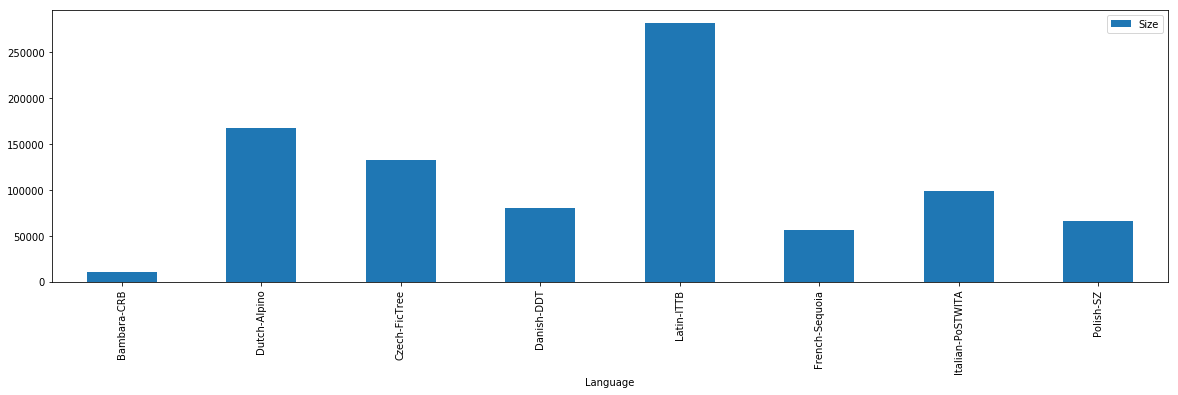

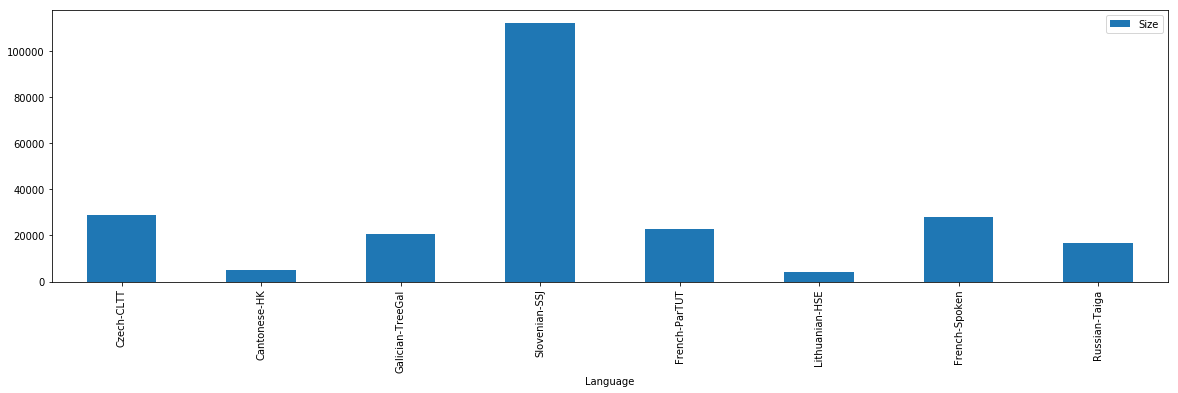

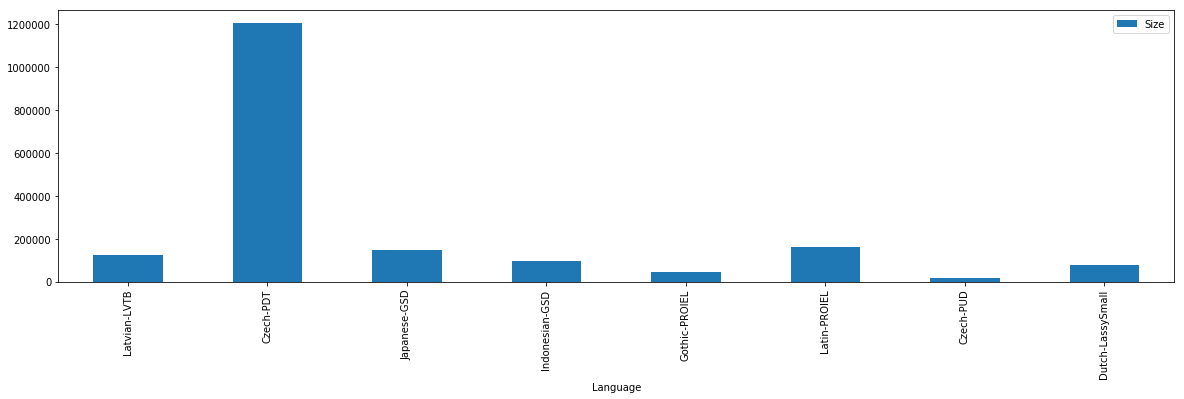

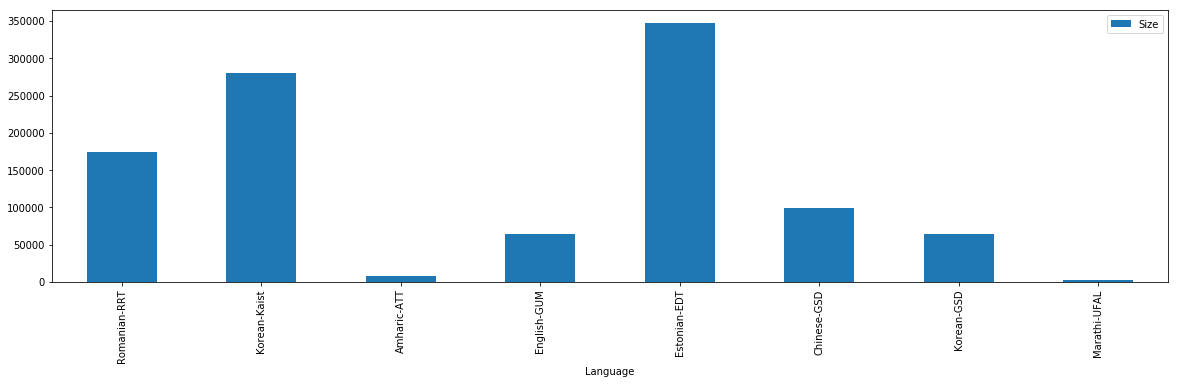

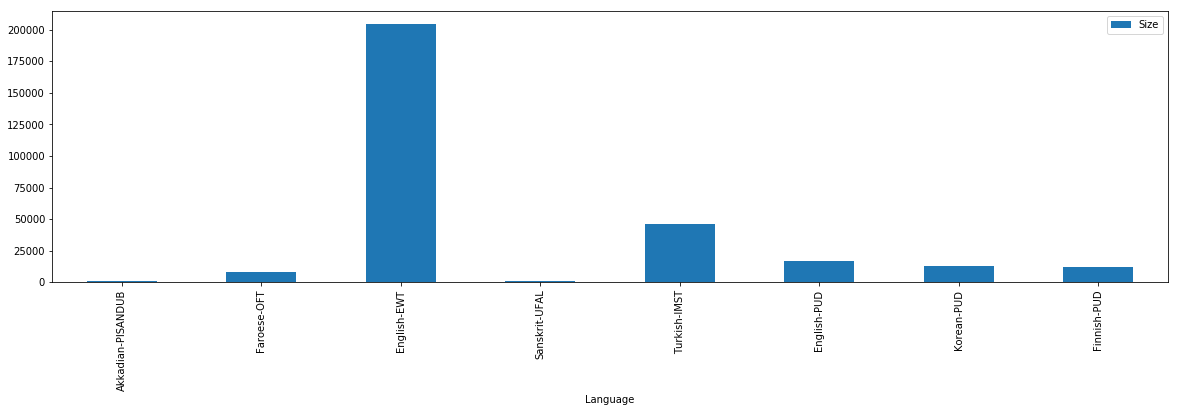

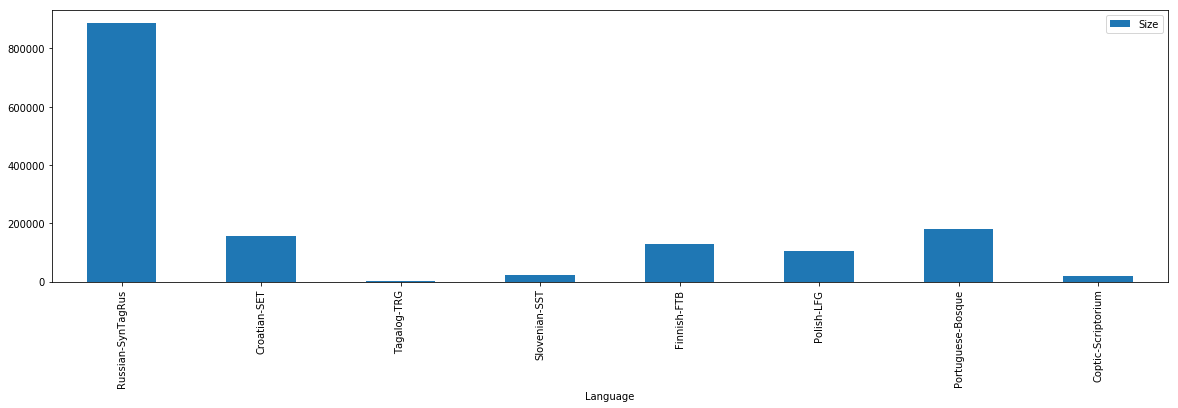

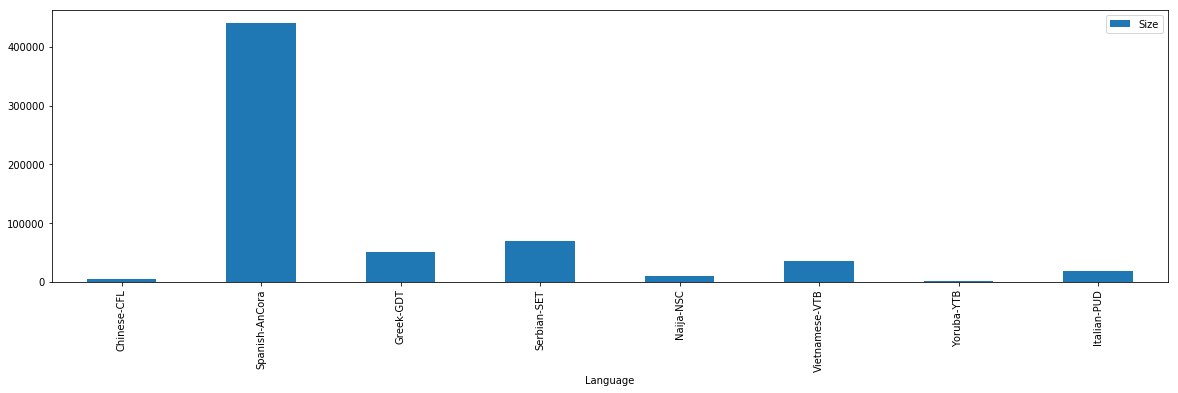

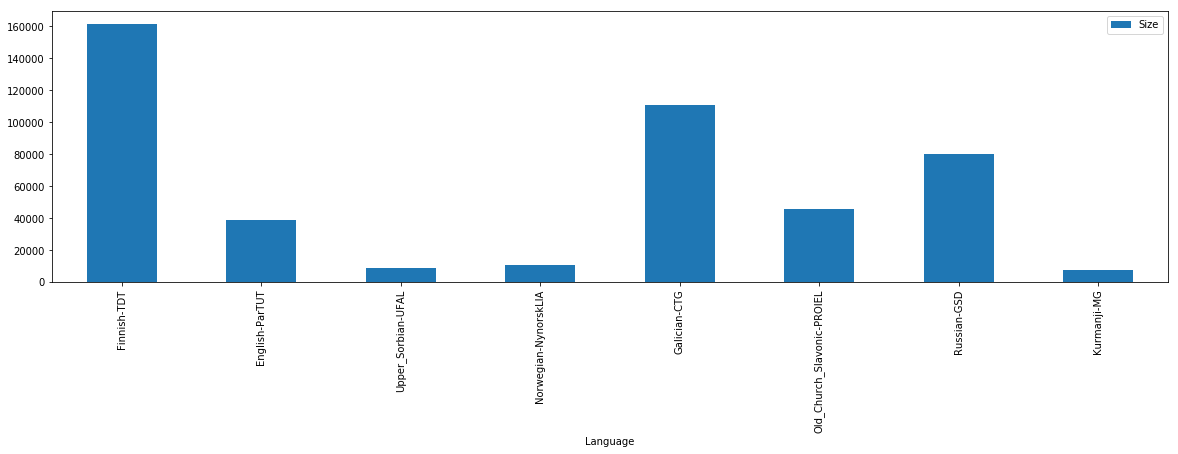

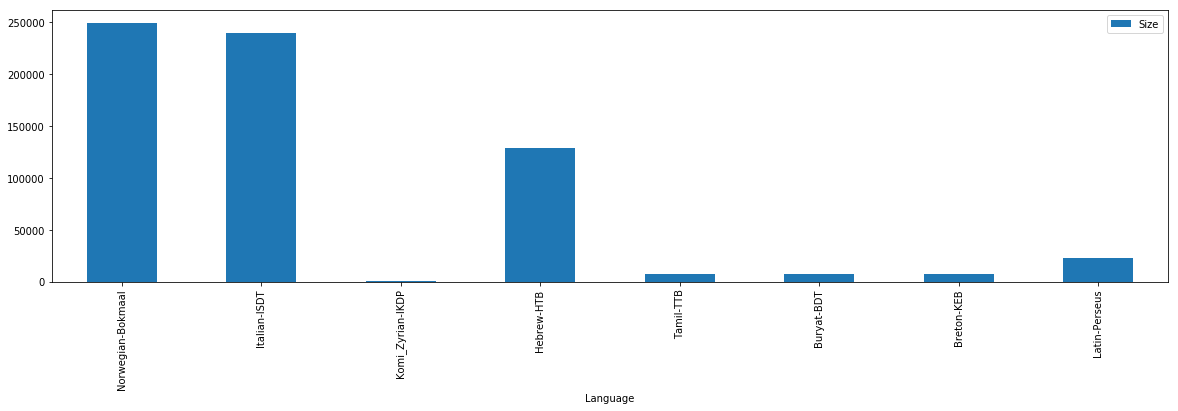

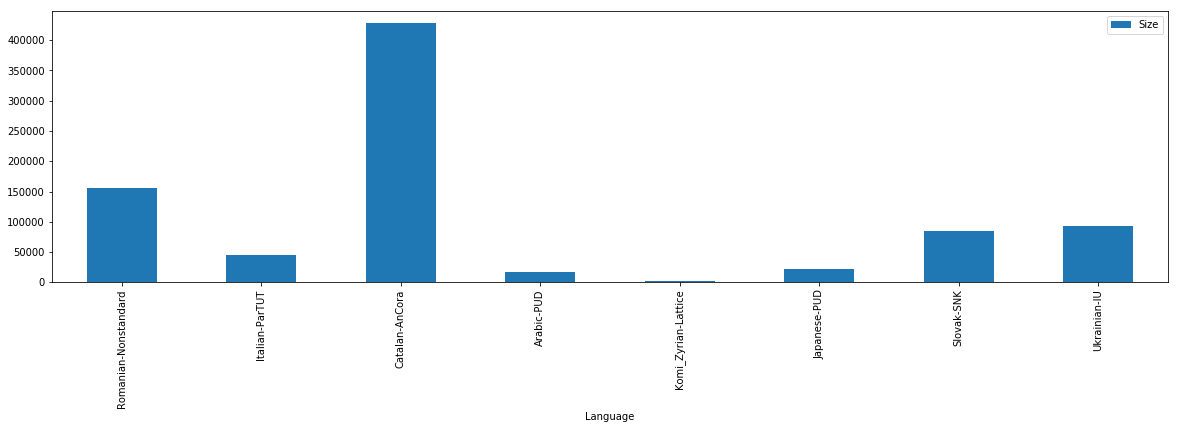

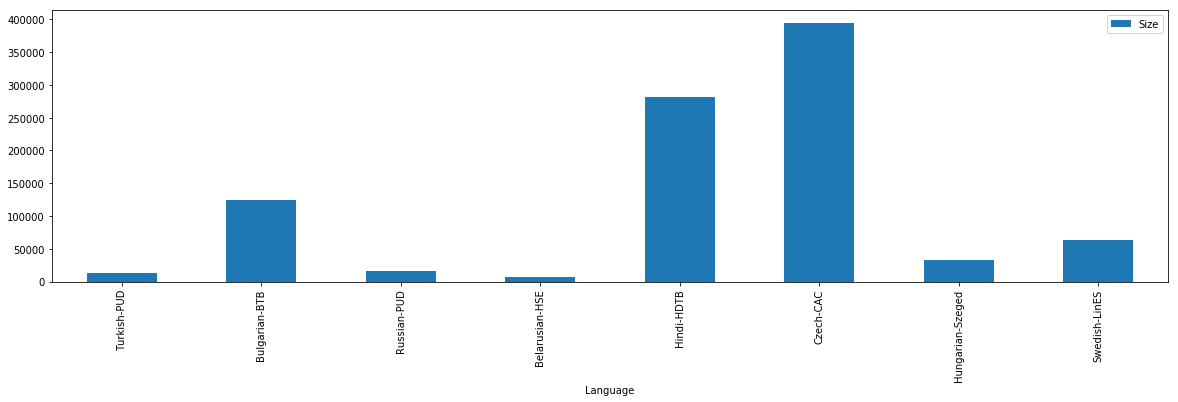

In [132]:
data_sizes = []
for language_name, stats in dataset_stats.items():
    row = {'Language': language_name, 'Size': stats['Number of tokens']}
    data_sizes.append(row)
data_sizes_df = pd.DataFrame(data_sizes)
data_sizes_df = data_sizes_df.set_index('Language')
step = 8
for i in range(step, len(data_sizes_df), step):
    data_sizes_df[i-step:i].plot.bar(figsize=(20,5))

## Unique Surface words vs Unique Lemmas
- All values are normalized by dataset sizes

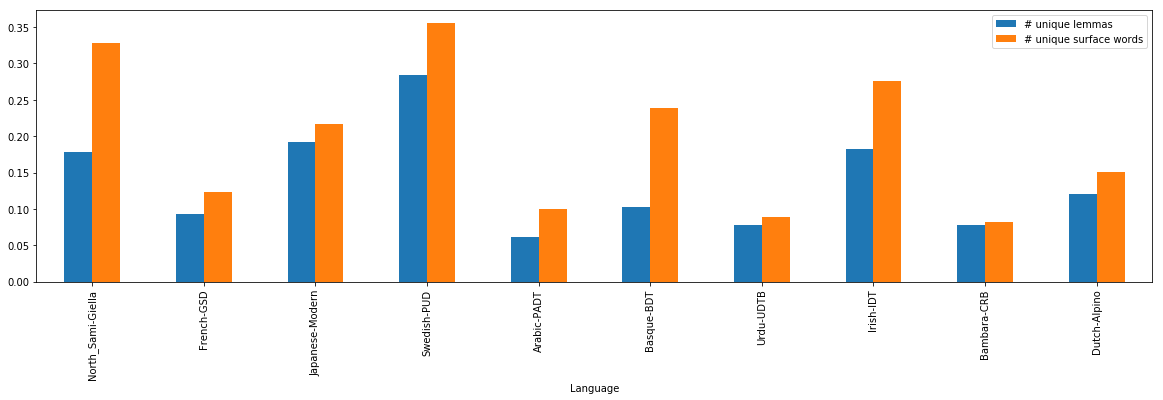

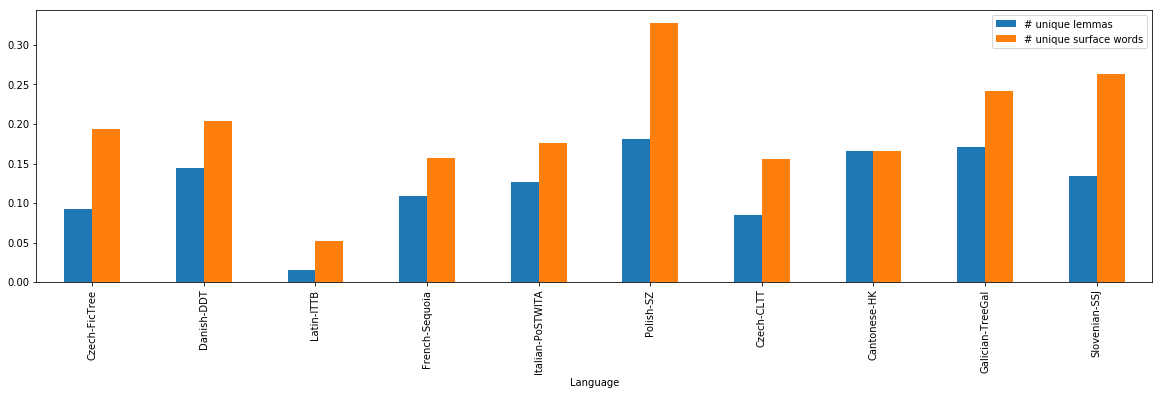

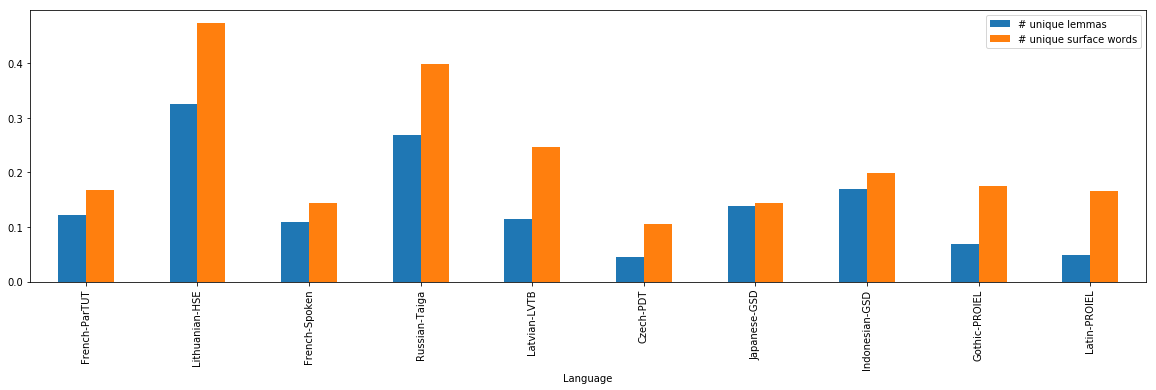

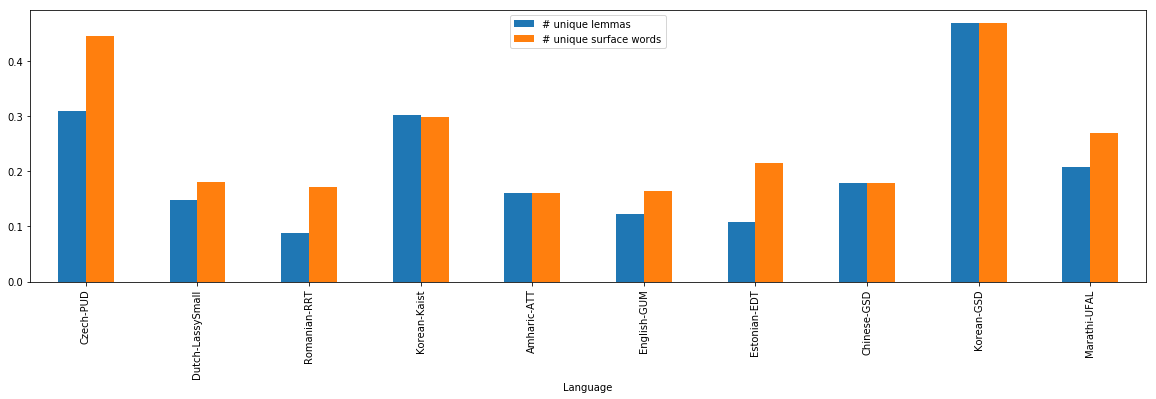

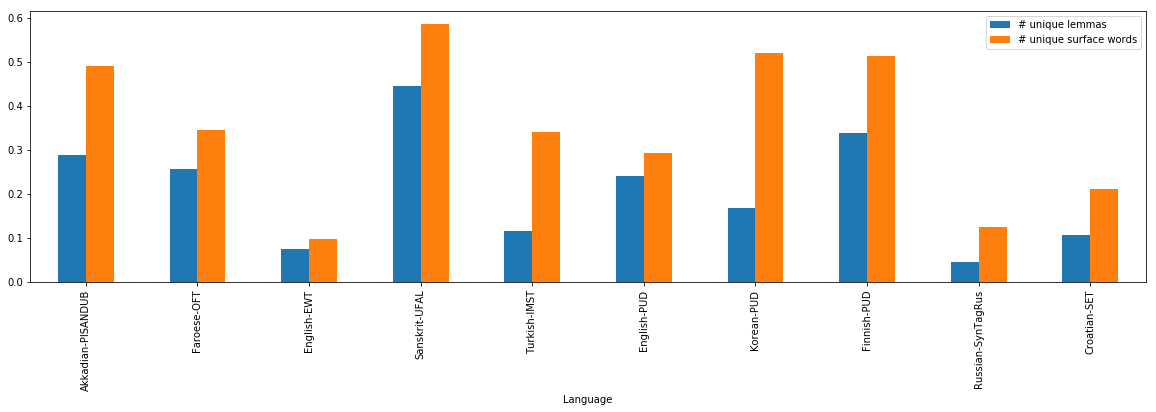

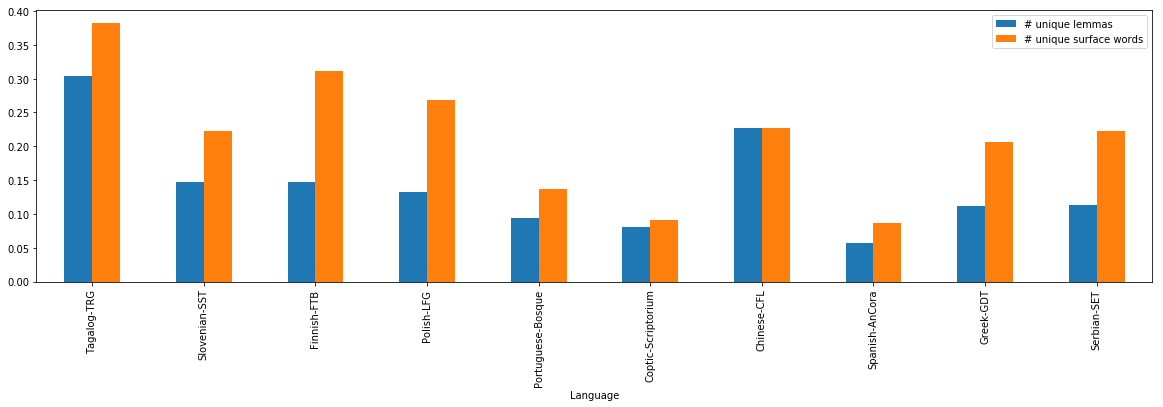

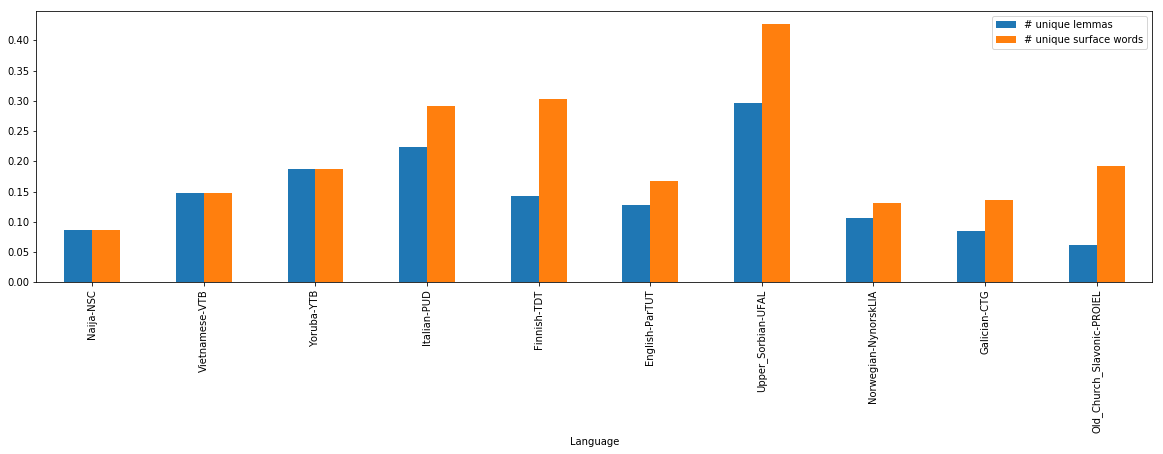

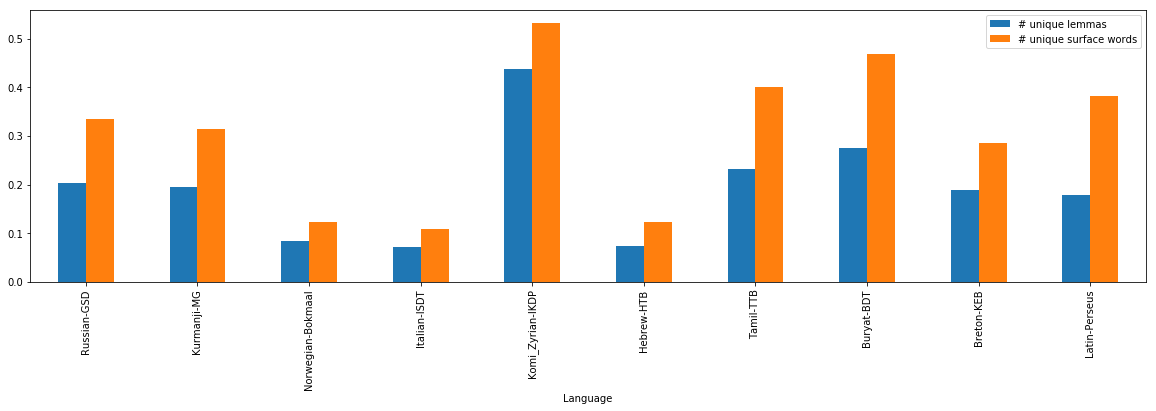

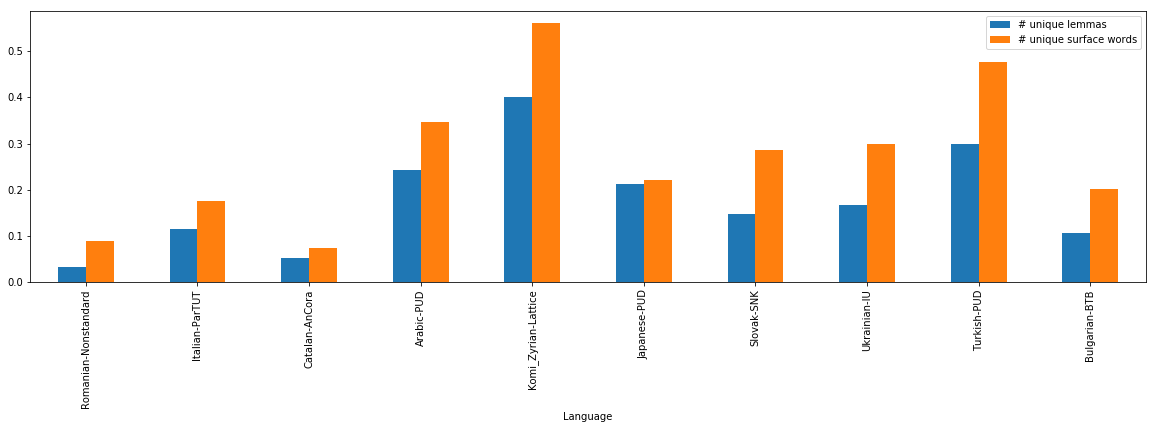

In [137]:
surface_lemma_stats_list = []
for language_name, stats in dataset_stats.items():
    row = {'Language': language_name, 
           '# unique surface words': stats['Number of unique words'] / stats['Number of tokens'],
           '# unique lemmas': stats['Number of unique lemmas'] / stats['Number of tokens']
          }
    surface_lemma_stats_list.append(row)
surface_lemma_stats_df = pd.DataFrame(surface_lemma_stats_list)
surface_lemma_stats_df = surface_lemma_stats_df.set_index('Language')
step = 10
for i in range(step, len(surface_lemma_stats_df), step):
    surface_lemma_stats_df[i-step:i].plot.bar(figsize=(20,5))

## Unique morphological features vs Unique morphological tags
- All values are normalized by dataset sizes

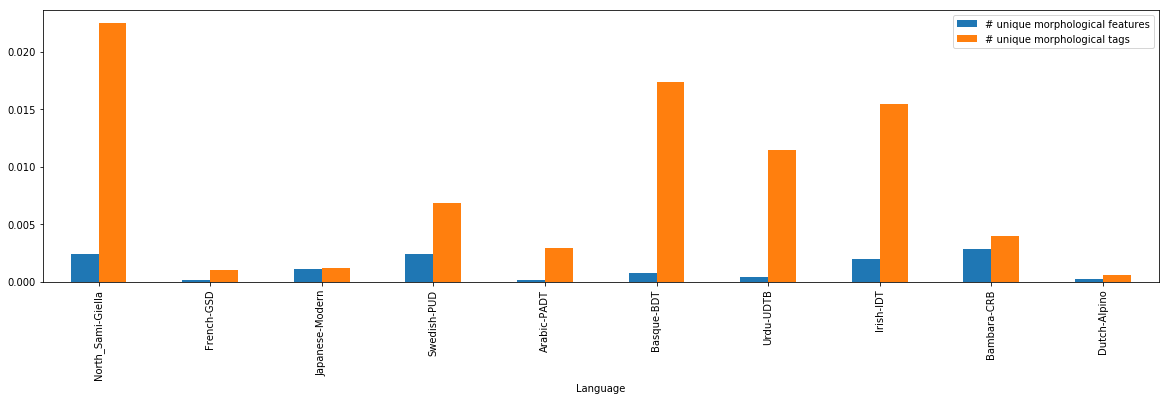

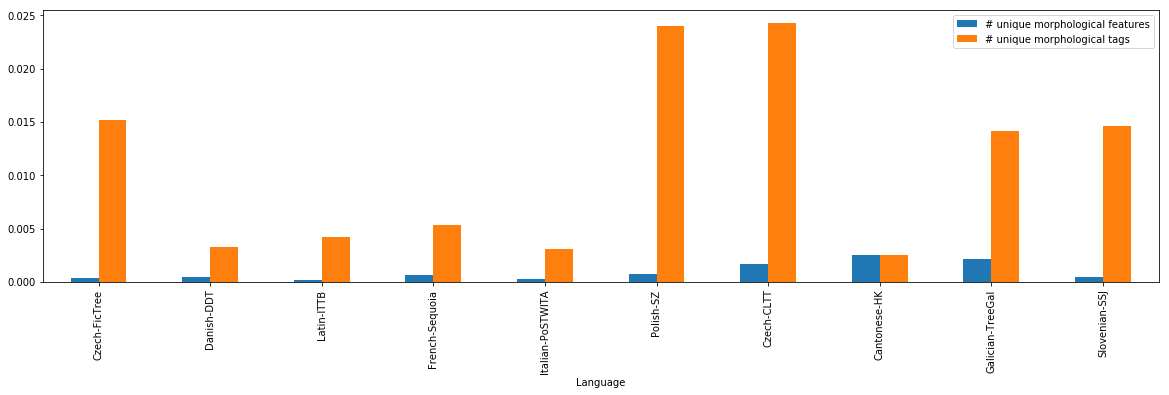

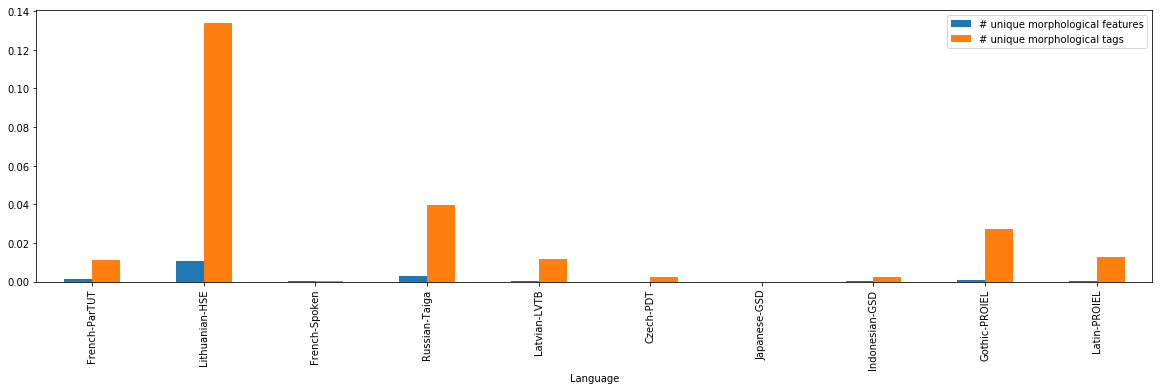

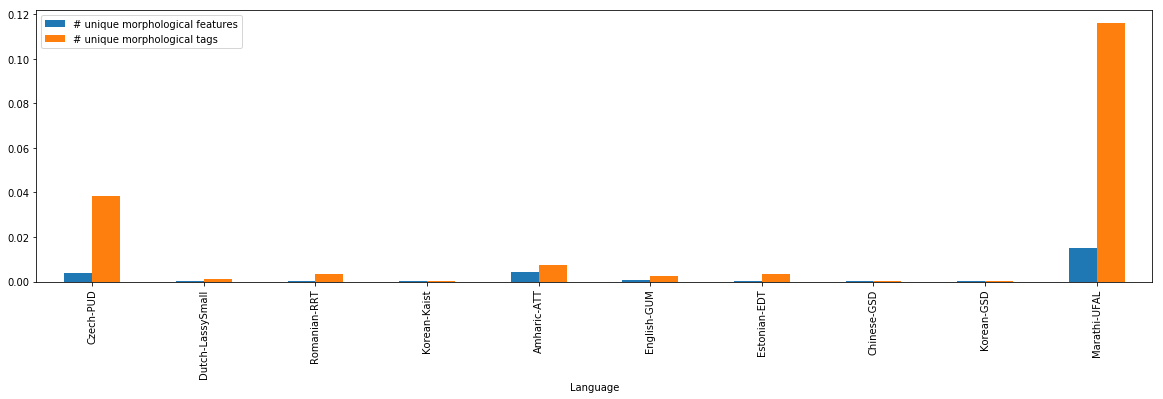

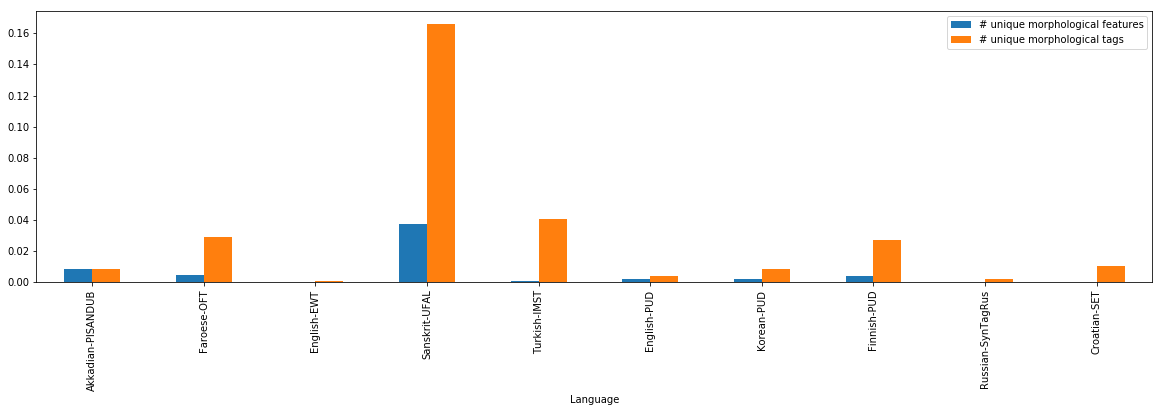

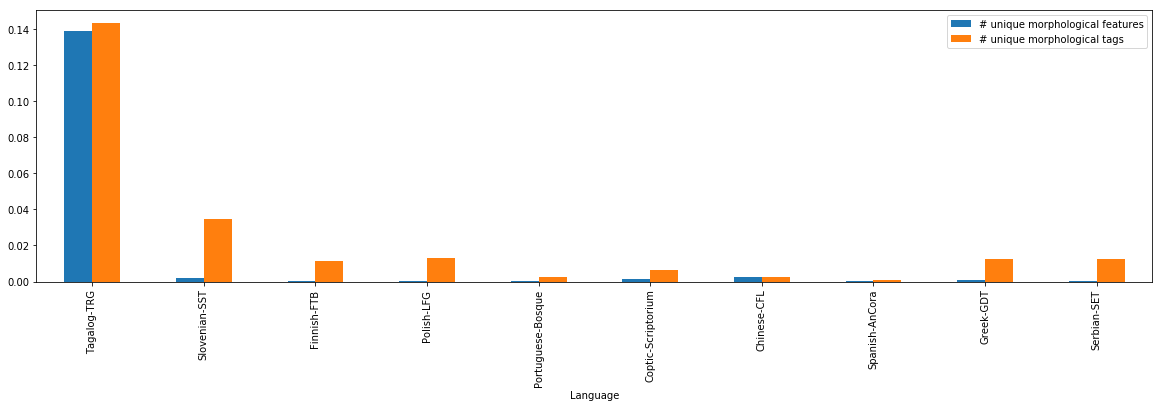

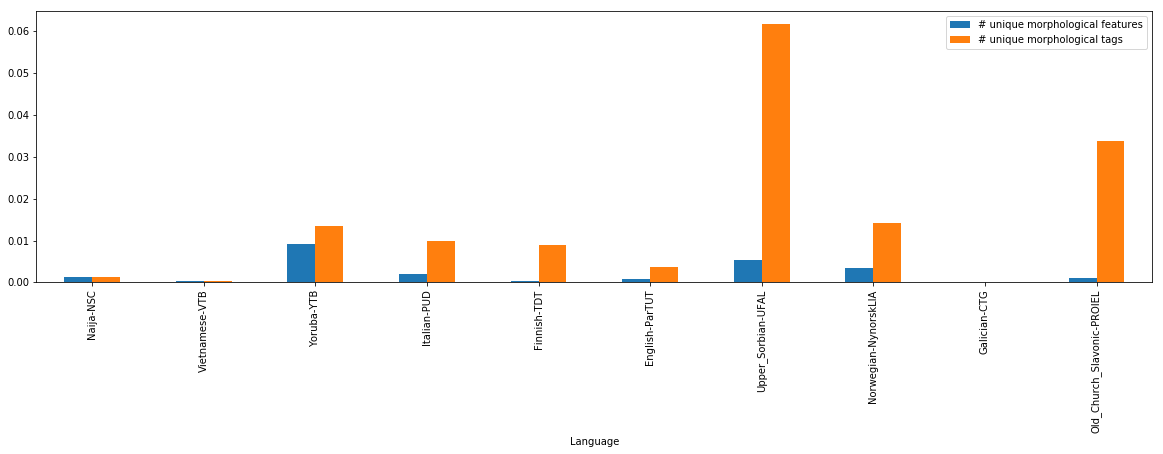

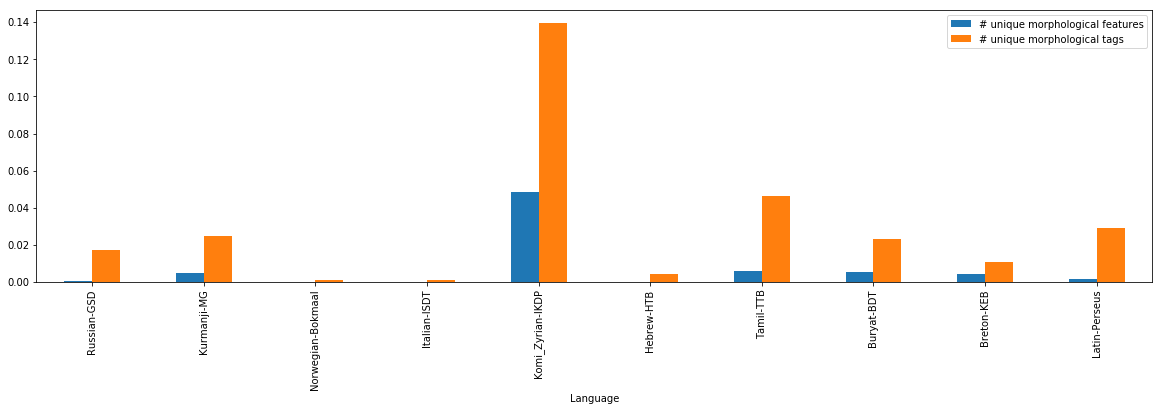

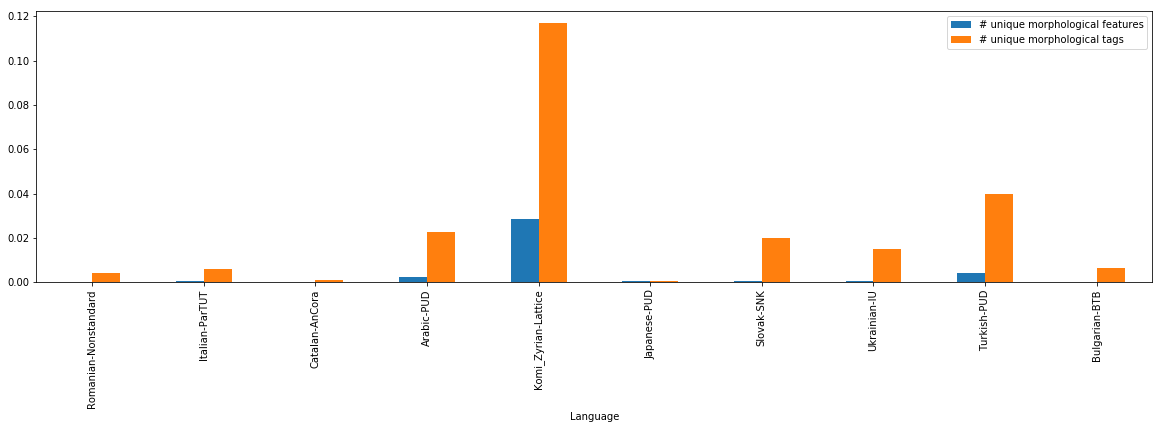

In [138]:
morph_stats_list = []
for language_name, stats in dataset_stats.items():
    row = {'Language': language_name,  
           '# unique morphological features': stats['Number of unique morphological features'] / stats['Number of tokens'],
           '# unique morphological tags': stats['Number of unique morphological tags'] / stats['Number of tokens']
          }
    morph_stats_list.append(row)
morph_stats_df = pd.DataFrame(morph_stats_list)
morph_stats_df = morph_stats_df.set_index('Language')
step = 10
for i in range(step, len(morph_stats_df), step):
    morph_stats_df[i-step:i].plot.bar(figsize=(20,5))